## Course Review Classification Project📝

In this project, student course reviews stored in a JSON file are analyzed and classified as Good or Bad.

## 1. Load the JSON file that contains the student reviews.

In [1]:
import pandas as pd


file_path = "course_data.json"
df = pd.read_json(file_path)


df.head()


,CS 115,MATH 135,ECON 101,PSYCH 101,MATH 137,CHE 102,MATH 115,CS 135,MATH 136,PD 1,...,ECON 658,HIST 703,ECE 660,ECE 763,PLAN 606,BE 680,KIN 658,ERS 620,KIN 659,COMMST 101
course_title,Introduction to Computer Science 1,Algebra for Honours Mathematics,Introduction to Microeconomics,Introductory Psychology,Calculus 1 for Honours Mathematics,Chemistry for Engineers,Linear Algebra for Engineering,Designing Functional Programs,Linear Algebra 1 for Honours Mathematics,Career Fundamentals,...,Water Resource Economics,The History of Global Governance,Operation and Control of Future Integrated Ene...,Sustainable Distributed Power Generation,Modelling the City,Consulting,Physical Activity and Cognition,Skills Identification and Career Development,Wearable Technology,Theories of Communication
num_ratings,2111,1186,1143,899,780,760,712,687,671,664,...,0,0,0,0,0,0,0,0,0,0
useful,21%,84%,64%,73%,86%,23%,83%,90%,79%,21%,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
easy,10%,41%,70%,67%,56%,71%,42%,69%,41%,81%,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
liked,23%,78%,45%,79%,69%,34%,67%,89%,59%,6%,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [2]:
import pandas as pd
import numpy as np
import json


file_path = "course_data.json"
with open(file_path, 'r') as f:
    data = json.load(f)


df_clean = pd.DataFrame.from_dict(data, orient='index')


df_clean = df_clean.reset_index().rename(columns={'index':'course_code'})


for col in ['num_ratings', 'useful', 'easy', 'liked']:
    df_clean[col] = df_clean[col].replace('N/A', np.nan)
    df_clean[col] = df_clean[col].astype(str).str.rstrip('%')
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean.head()


,course_code,course_title,num_ratings,useful,easy,liked,reviews
0,CS 115,Introduction to Computer Science 1,2111,21.0,10.0,23.0,[{'review_text': 'go to office hours and pract...
1,MATH 135,Algebra for Honours Mathematics,1186,84.0,41.0,78.0,"[{'review_text': 'Welcome to Waterloo Math.', ..."
2,ECON 101,Introduction to Microeconomics,1143,64.0,70.0,45.0,[{'review_text': 'Took it online in W21 during...
3,PSYCH 101,Introductory Psychology,899,73.0,67.0,79.0,"[{'review_text': 'Really easy, the course was ..."
4,MATH 137,Calculus 1 for Honours Mathematics,780,86.0,56.0,69.0,"[{'review_text': 'and then isaac newton said ""..."


In [3]:

df_clean['target'] = df_clean['liked'].apply(lambda x: 'Good' if x >= 50 else 'Bad')

df_clean[['course_code','course_title','liked','target']].head()


,course_code,course_title,liked,target
0,CS 115,Introduction to Computer Science 1,23.0,Bad
1,MATH 135,Algebra for Honours Mathematics,78.0,Good
2,ECON 101,Introduction to Microeconomics,45.0,Bad
3,PSYCH 101,Introductory Psychology,79.0,Good
4,MATH 137,Calculus 1 for Honours Mathematics,69.0,Good


## 2. Initial Data Analysis (EDA)

We need to know:

- Total number of items

- Number of Good and Bad items

- Distribution: Useful, easy, liked

Total number of courses: 8479

Number of Good and Bad courses:
target
Bad     6034
Good    2445
Name: count, dtype: int64


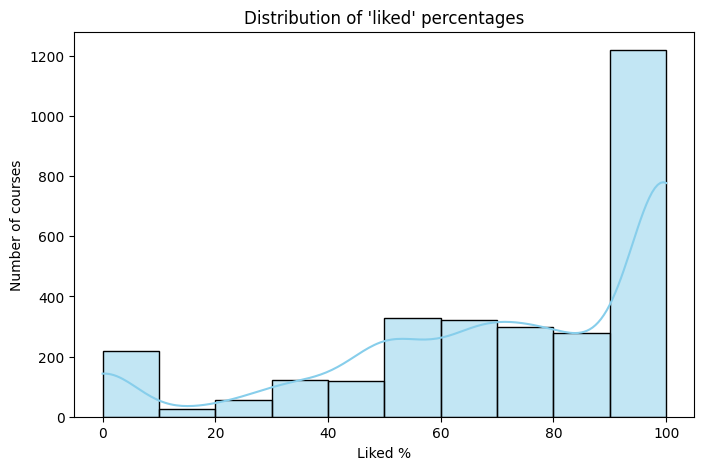

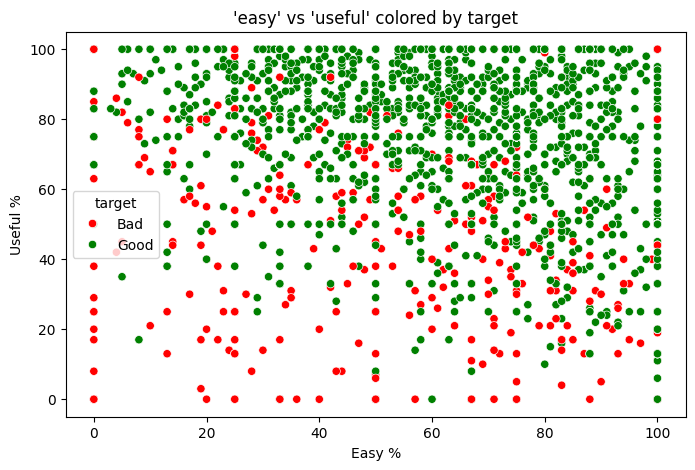

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


print("Total number of courses:", len(df_clean))


print("\nNumber of Good and Bad courses:")
print(df_clean['target'].value_counts())


plt.figure(figsize=(8,5))
sns.histplot(df_clean['liked'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of 'liked' percentages")
plt.xlabel('Liked %')
plt.ylabel('Number of courses')
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='easy', y='useful', hue='target', palette=['red','green'])
plt.title("'easy' vs 'useful' colored by target")
plt.xlabel('Easy %')
plt.ylabel('Useful %')
plt.show()


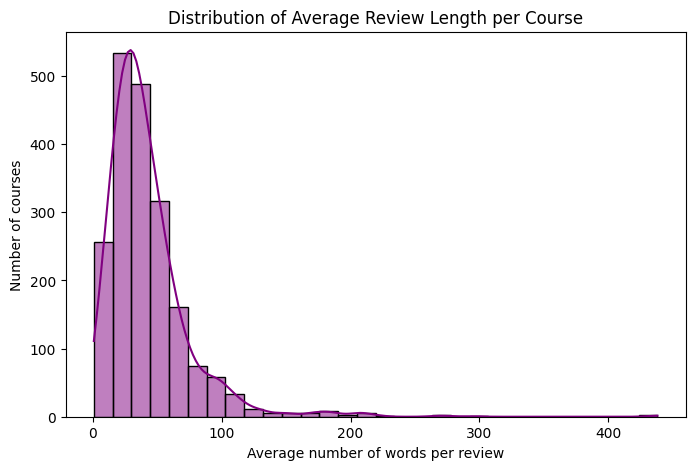

In [5]:

def avg_review_length(reviews_list):
    if isinstance(reviews_list, list) and len(reviews_list) > 0:

        lengths = [len(review['review_text'].split()) for review in reviews_list if 'review_text' in review]
        if len(lengths) > 0:
            return np.mean(lengths)
    return np.nan

df_clean['avg_review_length'] = df_clean['reviews'].apply(avg_review_length)

df_clean[['course_code','course_title','avg_review_length']].head()


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_clean['avg_review_length'].dropna(), bins=30, kde=True, color='purple')
plt.title("Distribution of Average Review Length per Course")
plt.xlabel('Average number of words per review')
plt.ylabel('Number of courses')
plt.show()


The values ​​are clustered around 20–50, meaning most assessments are relatively short.

##3. text preprocessing

- Convert text to lowercase.
- Remove punctuation and special
characters.
- Remove stopwords.
- Clean the text data.


In [6]:
import string
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def combine_and_clean_reviews(reviews_list):
    if isinstance(reviews_list, list) and len(reviews_list) > 0:
        all_text = ' '.join([review['review_text'] for review in reviews_list if 'review_text' in review])
        return clean_text(all_text)
    return ""


In [8]:
print("=== Before Cleaning ===")
for i, reviews_list in enumerate(df_clean['reviews'][:5]):
    print(f"\nCourse: {df_clean['course_code'][i]}")
    for review in reviews_list[:2]:
        print(review['review_text'])


=== Before Cleaning ===

Course: CS 115
go to office hours and practice
One of my least favourite courses. Although things were nicely organized, Racket was such an annoying language to use. The one tangible benefit I felt after using Racket was feeling more comfortable with recursion.

Course: MATH 135
Welcome to Waterloo Math.
pretty useful for the first year, for math courses generally. basically all of them have proofs of some sort and this course teaches you how to handle proofs really easily, basically formulaically. great prof and course notes too

Course: ECON 101
Took it online in W21 during COVID, concepts were taught in an abstract mathematical manner, which was fine (as a math major) however the concepts themselves just couldn't engage me enough to engage with the course. I'm sure if you put in minimum effort like most students you'll pass the course.
Very simple

Course: PSYCH 101
Really easy, the course was made up of 3 online quizzes (most of the questions were easily go

In [9]:
df_clean['cleaned_reviews'] = df_clean['reviews'].apply(combine_and_clean_reviews)


In [10]:
print("\n=== After Cleaning ===")
for i, text in enumerate(df_clean['cleaned_reviews'][:5]):
    print(f"\nCourse: {df_clean['course_code'][i]}")
    print(text[:300], "...")



=== After Cleaning ===

Course: CS 115
go office hours practice one least favourite courses although things nicely organized racket annoying language use one tangible benefit felt using racket feeling comfortable recursion starts low pace midterm gets really fast cannot understand content reaching end term racket restricted many things f ...

Course: MATH 135
welcome waterloo math pretty useful first year math courses generally basically proofs sort course teaches handle proofs really easily basically formulaically great prof course notes standard introduction common proof techniques depending background math may find course easy hard course notes textbo ...

Course: ECON 101
took online w21 covid concepts taught abstract mathematical manner fine math major however concepts couldnt engage enough engage course im sure put minimum effort like students youll pass course simple dont go specifics maths ironically makes harder involves memorization results opposed memorization ...

Course: 

# 4. Apply tokenization
using a pre-trained model.

In [11]:
!pip install transformers

In [12]:
from transformers import BertTokenizer

c:\Users\janah\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [14]:

sample_text = df_clean['cleaned_reviews'].iloc[0]
tokens = tokenizer.encode_plus(
    sample_text,
    max_length=128,
    truncation=True,
    padding='max_length',
    return_tensors='pt'
)

print("Tokens IDs:", tokens['input_ids'])
print("Attention Mask:", tokens['attention_mask'])


Tokens IDs: tensor([[  101,  2175,  2436,  2847,  3218,  2028,  2560,  8837,  5352,  2348,
          2477, 19957,  4114, 14513,  3388, 15703,  2653,  2224,  2028, 24600,
          5770,  2371,  2478, 14513,  3388,  3110,  6625, 28667,  9236,  3258,
          4627,  2659,  6393,  3054,  3334,  2213,  4152,  2428,  3435,  3685,
          3305,  4180,  4285,  2203,  2744, 14513,  3388,  7775,  2116,  2477,
          2514,  4558,  4071, 16861, 14799,  5186,  2524,  3054,  3334,  2213,
          2985,  2878,  2154,  9611, 25551,  2028,  3893,  8605,  2640, 17974,
         21094,  2431,  3413,  2607,  5147,  2165,  2760,  4730,  3325,  2412,
          2318,  3492,  4030,  2134,  2102,  2428,  3477,  3086,  8949,  2369,
          2253,  2843,  2436,  2847,  9690,  3236, 11519,  2135,  2092,  2635,
         20116,  5352, 14513,  3388,  2428,  6881,  2653,  3866,  2673, 20116,
         10630,  2307, 19922,  4189, 14799,  2131, 24026,  2045,  2015,  4121,
          3815,  2436,  2847,  5463,  22

-  Tokens IDs → represent each word in the texts converted into numbers ready for the BERT model, including the start [CLS] and end [SEP] tokens.

- Attention Mask → indicates which tokens are real (1) and which are padding (0), telling the model which parts of the text are meaningful.


In [15]:

input_ids = []
attention_masks = []

for text in df_clean['cleaned_reviews']:
    encoded = tokenizer.encode_plus(
        text,
        max_length=128,
        truncation=True,
        padding='max_length',
        return_tensors='pt'
    )
    input_ids.append(encoded['input_ids'])
    attention_masks.append(encoded['attention_mask'])


import torch
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

print("Shape of input_ids:", input_ids.shape)
print("Shape of attention_masks:", attention_masks.shape)


Shape of input_ids: torch.Size([8479, 128])
Shape of attention_masks: torch.Size([8479, 128])


- Shape ([8479,128]) → 8479 courses × 128 fixed length for each text after truncation/padding, ready for BERT training.







## 5. Train Three Classifiers
to Predict Whether a Course is Good or Bad


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


le = LabelEncoder()
df_clean['target_num'] = le.fit_transform(df_clean['target'])  # Bad=0, Good=1


features = ['easy', 'useful', 'num_ratings']
X = df_clean[features].copy()
y = df_clean['target_num']

# Remov NaN value
X = X.dropna()
y = y[X.index]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", round(accuracy_score(y_test, y_pred),4))
    print("Precision:", round(precision_score(y_test, y_pred),4))
    print("Recall:", round(recall_score(y_test, y_pred),4))
    print("F1-score:", round(f1_score(y_test, y_pred),4))


Train shape: (2210, 3)
Test shape: (553, 3)

=== Logistic Regression ===
Confusion Matrix:
 [[ 42  58]
 [ 20 433]]
Accuracy: 0.859
Precision: 0.8819
Recall: 0.9558
F1-score: 0.9174

=== Random Forest ===
Confusion Matrix:
 [[ 44  56]
 [ 28 425]]
Accuracy: 0.8481
Precision: 0.8836
Recall: 0.9382
F1-score: 0.9101

=== SVM ===
Confusion Matrix:
 [[ 24  76]
 [  6 447]]
Accuracy: 0.8517
Precision: 0.8547
Recall: 0.9868
F1-score: 0.916


## 6. Evaluate each classifier using:
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1-score


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", round(accuracy_score(y_test, y_pred),4))
    print("Precision:", round(precision_score(y_test, y_pred),4))
    print("Recall:", round(recall_score(y_test, y_pred),4))
    print("F1-score:", round(f1_score(y_test, y_pred),4))



=== Logistic Regression ===
Confusion Matrix:
 [[ 42  58]
 [ 20 433]]
Accuracy: 0.859
Precision: 0.8819
Recall: 0.9558
F1-score: 0.9174

=== Random Forest ===
Confusion Matrix:
 [[ 44  56]
 [ 28 425]]
Accuracy: 0.8481
Precision: 0.8836
Recall: 0.9382
F1-score: 0.9101

=== SVM ===
Confusion Matrix:
 [[ 24  76]
 [  6 447]]
Accuracy: 0.8517
Precision: 0.8547
Recall: 0.9868
F1-score: 0.916



# Conclusion

**Logistic Regression:** Balanced between Precision and Recall → Best overall performance.

**Random Forest:** Good performance, but lower in Recall and F1.

**SVM:** Excellent at identifying Good (high Recall), but makes more mistakes with Bad.


# 7. Comparison
of the Performance of the Three Classifiers

In [18]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred),4),
        'Precision': round(precision_score(y_test, y_pred),4),
        'Recall': round(recall_score(y_test, y_pred),4),
        'F1-score': round(f1_score(y_test, y_pred),4)
    })

results_df = pd.DataFrame(results)

results_df = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']]

results_df


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.8590,0.8819,0.9558,0.9174
1,Random Forest,0.8481,0.8836,0.9382,0.9101
2,SVM,0.8517,0.8547,0.9868,0.9160




**After the table:**

* **Logistic Regression** → Best balance across all metrics
* **Random Forest** → Good, but slightly lower in Recall and F1-score
* **SVM** → Best in Recall (detects almost all Good courses), but lower Precision (makes more mistakes on Bad courses)
